# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using Seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [39]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import warnings; warnings.simplefilter('ignore')

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [24]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data.Gender == 'Male']
female_df = data.loc[data['Gender'] == 'Female']
for col in male_df:
    if col == 'Gender':
        continue
    print(f"Male {col} mean: {male_df[col].mean()}")
    print(f"Male {col} std: {male_df[col].std()}")
for col in female_df:
    if col == 'Gender':
        continue
    print(f"Female {col} mean: {female_df[col].mean()}")
    print(f"Female {col} std: {female_df[col].std()}")
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height std: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height std: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight std: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

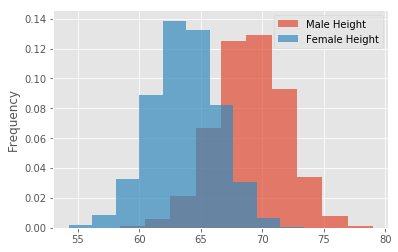

In [25]:
# Your code here
plt.hist(male_df['Height'], alpha = 0.7, bins = 10, label = 'Male Height', density = True)
plt.hist(female_df['Height'], alpha = 0.7, bins = 10, label = 'Female Height', density = True)
plt.ylabel('Frequency')
plt.legend()

### Record your observations - are these inline with your personal observations?
Males are taller on average than females.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.hist()`
- The function should return two lists carrying x and y coordinates for plotting the density function

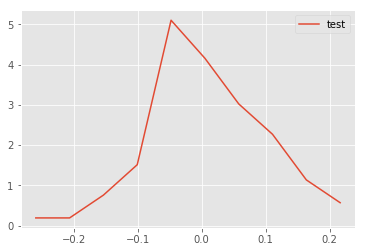

In [27]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    ax = np.zeros(n.size)
    ay = np.zeros(n.size)
    
    for k in range(n.size):
        ax[k] = 0.5*(bins[k]+bins[k+1])
        ay[k] = n[k]
    
    return ax, ay

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

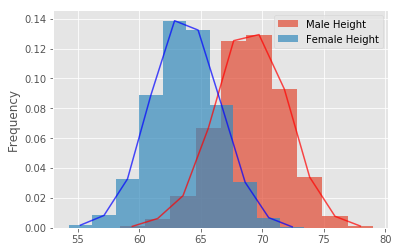

In [32]:
# You code here 
plt.hist(male_df['Height'], alpha = 0.7, bins = 10, label = 'Male Height', density = True)
plt.hist(female_df['Height'], alpha = 0.7, bins = 10, label = 'Female Height', density = True)
x,y = density(male_df['Height'])
plt.plot(x, y, alpha = 0.7, color = 'red')
x,y = density(female_df['Height'])
plt.plot(x, y, alpha = 0.7, color = 'blue')
plt.ylabel('Frequency')
plt.legend()

## Repeat the above exercise for male and female weights

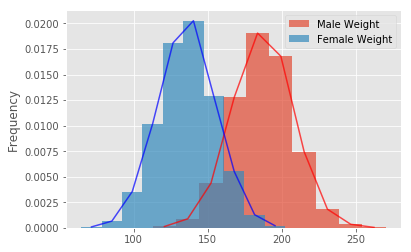

In [33]:
# Your code here 
plt.hist(male_df['Weight'], alpha = 0.7, bins = 10, label = 'Male Weight', density = True)
plt.hist(female_df['Weight'], alpha = 0.7, bins = 10, label = 'Female Weight', density = True)
x,y = density(male_df['Weight'])
plt.plot(x, y, alpha = 0.7, color = 'red')
x,y = density(female_df['Weight'])
plt.plot(x, y, alpha = 0.7, color = 'blue')
plt.ylabel('Frequency')
plt.legend()

## Write your observations in the cell below

### Record your observations - are these inline with your personal observations?
Males also have a higher weight on average.

### What is the takeaway when comparing male and female heights and weights?
The distribution appears pretty similar between the two.

## Repeat the above experiments in seaborn and compare with your results

In [34]:
import seaborn as sns

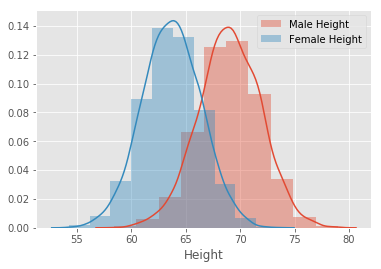

In [52]:
# Code for heights here
sns.distplot(male_df['Height'], bins = 10, label = 'Male Height')
sns.distplot(female_df['Height'], bins = 10, label = 'Female Height')
# sns.distplot(data['Height'], color = 'Gender')
plt.legend()
plt.show()

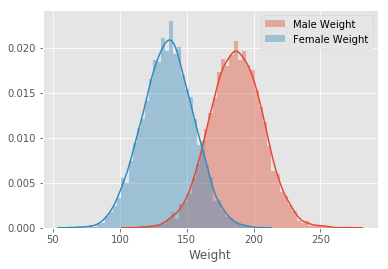

In [49]:
# Code for weights here
sns.distplot(male_df['Weight'], label = 'Male Weight')
sns.distplot(female_df['Weight'], label = 'Female Weight')
# sns.distplot(data['Height'], color = 'Gender')
plt.legend()
plt.show()

### Your comments on the two approaches here. 
Seaborn is much easier in terms of amount of necessary code.

### Are they similar? What makes them different if they are?
They are similar in terms of showing the data, however, Seaborn's density line is smoother.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.